# Importing Libraries

In [1]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as pltt
import numpy as np
from decimal import Decimal

def save_csv(dataFrame, path):
    dataFrame.to_csv(path, index=False)

# Data Understanding

### 1) How many persons rated one particular restaurant ?

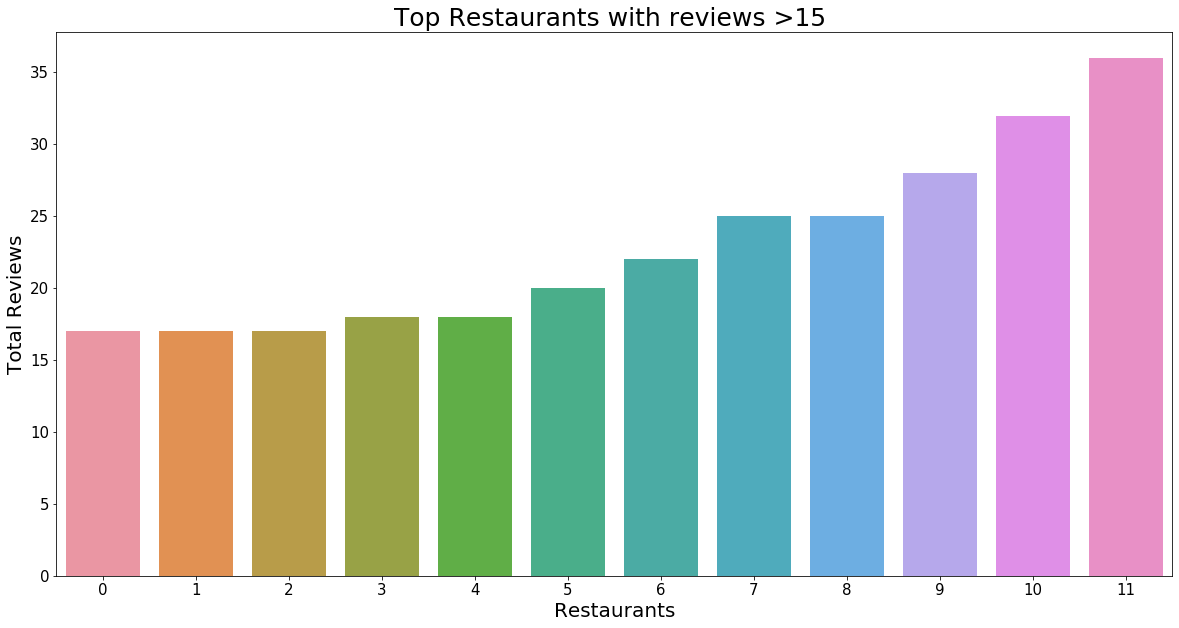

In [2]:
our_rest_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/Our_Rest_Info.csv")
user_rating = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/rating_final.csv")

total_reviews = []
for IDs in list(our_rest_info['ID'].unique()):
    temp = user_rating[user_rating['placeID']==IDs]
    total_reviews.append(1 if len(temp)==0 else len(temp))
    
max_reviews = []
ids = []

for (reviews, ID) in zip(total_reviews, list(our_rest_info['ID'].unique())):
    if reviews>15:
        max_reviews.append(reviews)
        ids.append(ID)

max_reviews.sort()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
axis_info = list(range(len(max_reviews)))
fig = pltt.barplot(axis_info,max_reviews)
plt.xlabel('Restaurants', fontsize=20)
plt.ylabel('Total Reviews', fontsize=20)
plt.title('Top Restaurants with reviews >15 ', fontsize=25)
plt.show(fig)

### 2) What is the Budget-wise distribution of listed restaurants

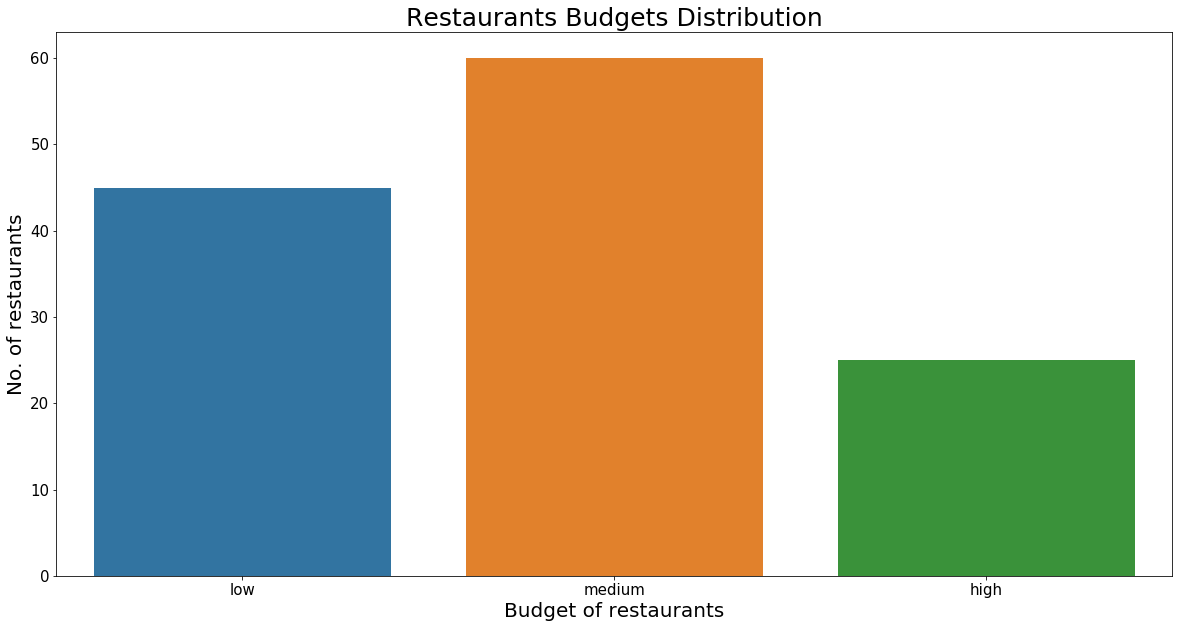

In [3]:
rest_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/geoplaces2.csv")

low = rest_info[rest_info['price']=='low']['price'].count()
medium = rest_info[rest_info['price']=='medium']['price'].count()
high = rest_info[rest_info['price']=='high']['price'].count()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
fig = pltt.barplot(['low', 'medium', 'high'],[low, medium, high])
plt.xlabel('Budget of restaurants', fontsize=20)
plt.ylabel('No. of restaurants', fontsize=20)
plt.title('Restaurants Budgets Distribution', fontsize=25)
plt.show(fig)

### 3) What is the Budget-wise distribution of Users

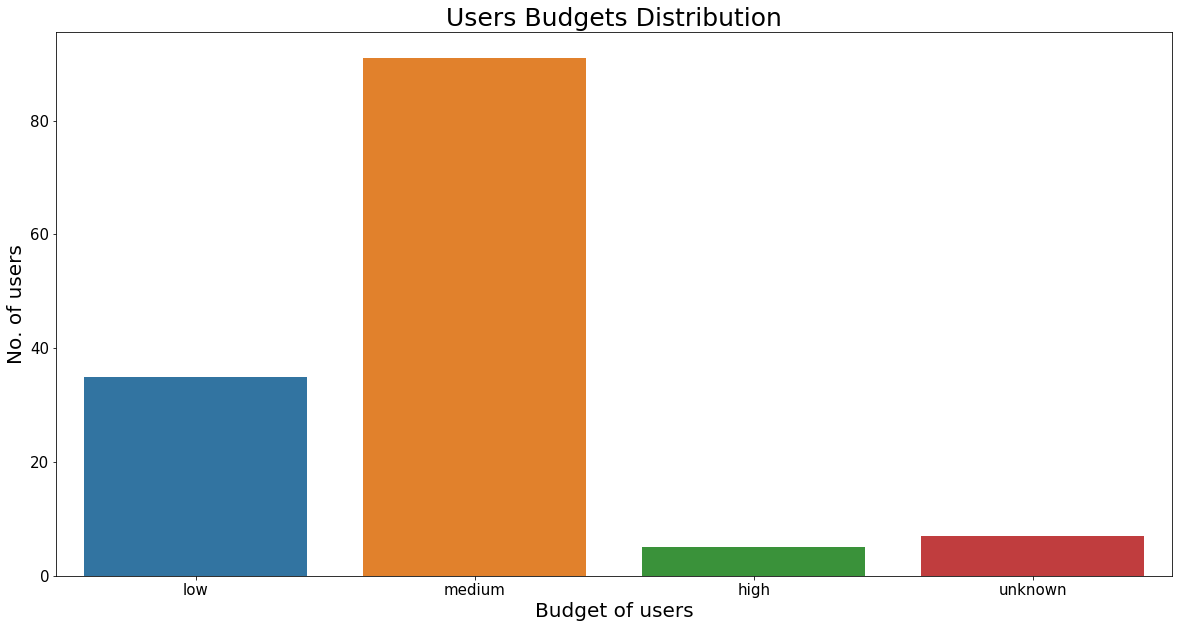

In [4]:
budget_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/userprofile.csv")

low = budget_info[budget_info['budget']=='low']['budget'].count()
medium = budget_info[budget_info['budget']=='medium']['budget'].count()
high = budget_info[budget_info['budget']=='high']['budget'].count()
unknown = budget_info[budget_info['budget']=='?']['budget'].count()

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
fig = pltt.barplot(['low', 'medium', 'high', 'unknown'],[low, medium, high, unknown])
plt.xlabel('Budget of users', fontsize=20)
plt.ylabel('No. of users', fontsize=20)
plt.title('Users Budgets Distribution', fontsize=25)
plt.show(fig)

### 4) What is the Age-Group distribution of Users

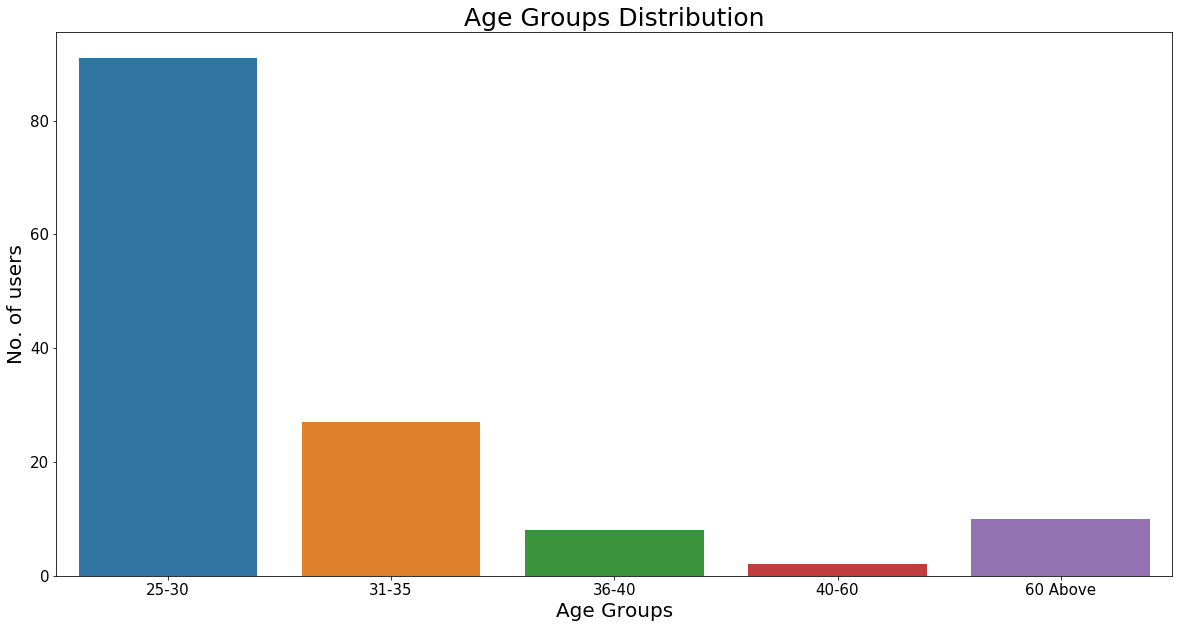

In [5]:
user_age_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/Our_User_Info.csv")

a=list(user_age_info['Age'].unique())
a.sort()

count=[]
for i in a:
    count.append(len(user_age_info[user_age_info['Age']==i]))
    
final_count=[]
final_count.append(sum(count[:6]))
final_count.append(sum(count[6:11]))
final_count.append(sum(count[11:15]))
final_count.append(sum(count[15:17]))
final_count.append(sum(count[17:]))

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))
fig = pltt.barplot(['25-30', '31-35', '36-40', '40-60', '60 Above'],final_count)
plt.xlabel('Age Groups', fontsize=20)
plt.ylabel('No. of users', fontsize=20)
plt.title('Age Groups Distribution', fontsize=25)
plt.show(fig)

### 5) What is the offered cuisines distribution of Restaurants

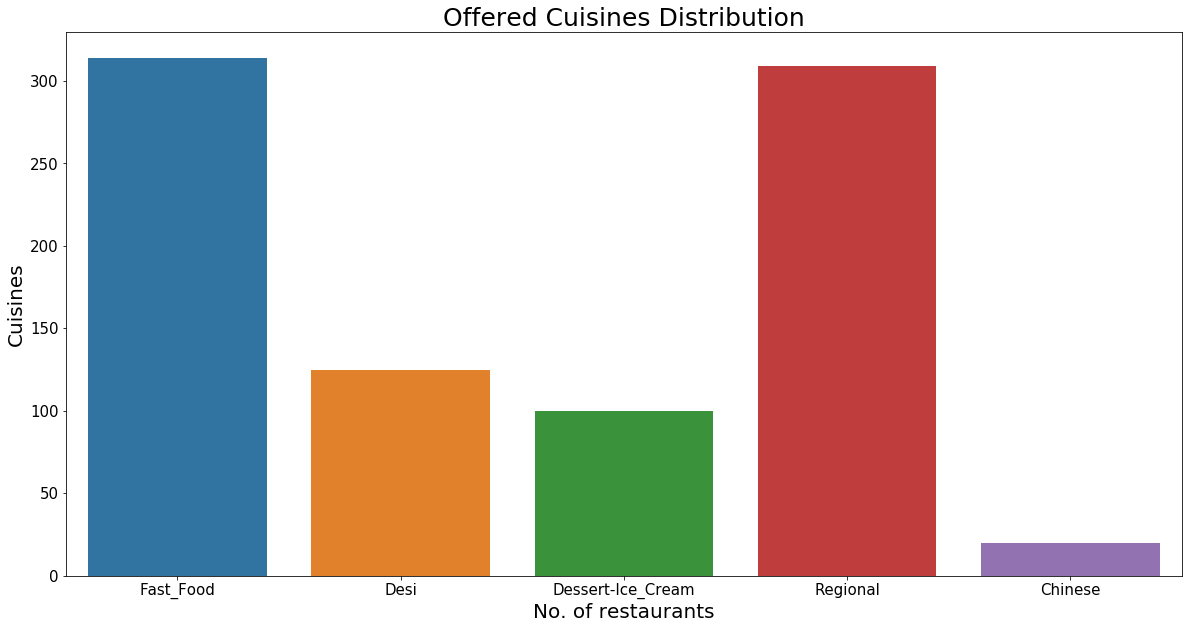

In [6]:
rest_cuisine_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/chefmozcuisine.csv")
rest_cuisine_info = rest_cuisine_info.drop_duplicates()

a=list(rest_cuisine_info['Rcuisine'].unique())

count=[]
for i in a:
    count.append(len(rest_cuisine_info[rest_cuisine_info['Rcuisine']==i]))
    
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(20,10))    
fig = pltt.barplot(a,count)
plt.xlabel('No. of restaurants', fontsize=20)
plt.ylabel('Cuisines', fontsize=20)
plt.title('Offered Cuisines Distribution', fontsize=25)
plt.show(fig)

# Making Our Dataframe

In [7]:
our_user_info = pd.DataFrame(columns=['ID', 'ModePayment', 'Cuisine', 'Longitude', 'Latitude', 'Age', 'Budget'])
our_user_info = our_user_info.astype({'ID':int, 'ModePayment':str, 'Cuisine':str, 'Longitude':float, 'Latitude':float, 'Age':int, 'Budget':str})
our_rest_info = pd.DataFrame(columns=['ID', 'Cuisine', 'Longitude', 'Latitude', 'Start_Time', 'End_Time', 'Avg_Ratings', 'Budget'])
our_rest_info = our_rest_info.astype({'ID':int, 'Cuisine':str, 'Longitude':float, 'Latitude':float, 'Start_Time':int, 'End_Time':int, 'Avg_Ratings':int, 'Budget':str})


# Loading Meta-Data for Restaurants

In [8]:
rest_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/chefmozcuisine.csv")
rest_cuisine_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/chefmozcuisine.csv")
rest_loc_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/geoplaces2.csv")
rest_rating_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/rating_1to5.csv")
rest_time_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/chefmozhours4.csv")


rest_time_info = rest_time_info.drop_duplicates()
rest_rating_info = rest_rating_info.drop_duplicates()
rest_info = rest_info.drop_duplicates()
rest_cuisine_info = rest_cuisine_info.drop_duplicates()
rest_loc_info = rest_loc_info.drop_duplicates()

In [9]:
count=0
for IDs in list(rest_info['placeID'].unique()):
    temp = rest_cuisine_info[rest_cuisine_info['placeID'] == IDs ]
    temp1 = rest_rating_info[rest_rating_info['placeID'] == IDs ]
    temp2 = rest_time_info[rest_time_info['placeID'] == IDs]
    if (IDs == rest_loc_info['placeID'].any() and IDs == rest_time_info['placeID'].any()):
        our_rest_info = our_rest_info.append({
         'Longitude': rest_loc_info['longitude'],
         'Latitude' : rest_loc_info['latitude'],
         'Avg_Ratings': round((temp1['rating'].sum() + temp1['food_rating'].sum() + temp1['service_rating'].sum())/(36*3)),
         'Start_Time': int(rest_time_info[rest_time_info['placeID']==IDs]['hours'][1].split('-')[0].split(':')[0]),
         'End_Time' : int(rest_time_info[rest_time_info['placeID']==IDs]['hours'][1].split('-')[1].split(':')[0]),
         'Budget' : rest_loc_info['price'],
         'ID':int(IDs),
         'Cuisine': ','.join(list(temp['Rcuisine']))
          }, ignore_index=True)
    else:
        our_rest_info = our_rest_info.append({
         'Longitude': random.randrange(-1010000,-990000)/10000,
         'Latitude' : random.randrange(180000,230000)/10000,
         'Avg_Ratings': random.randrange(0,5),
         'Start_Time': 8,
         'End_Time' : 23,
         'Budget' : random.choice(['low','medium','high']),
         'ID':int(IDs),
         'Cuisine': ','.join(list(temp['Rcuisine']))
          }, ignore_index=True)


our_rest_info.head(10)

,ID,Cuisine,Longitude,Latitude,Start_Time,End_Time,Avg_Ratings,Budget
0,135110,Fast_Food,-99.7709,21.5988,8,23,1,high
1,135109,Fast_Food,-99.1368,18.4190,8,23,0,medium
2,135107,Fast_Food,-99.9397,22.7752,8,23,4,low
3,135106,Fast_Food,-99.0331,19.1208,8,23,2,medium
4,135105,Fast_Food,-99.1334,22.4845,8,23,0,medium
5,135104,Fast_Food,-100.2067,18.1418,8,23,0,low
6,135103,"Desi,Dessert-Ice_Cream,Fast_Food",-100.1893,21.0642,8,23,3,high
7,135102,"Fast_Food,Desi",-99.6780,19.6383,8,23,4,low
8,135101,"Fast_Food,Desi",-100.0653,21.4287,8,23,2,low
9,135100,"Fast_Food,Desi",-99.6632,19.5446,8,23,3,low


# Loading Meta-Data for Users

In [10]:
user_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/userprofile.csv")
user_cuisine_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/usercuisine.csv")
user_payment_info = pd.read_csv("C:/Users/Naufil Hassan/Downloads/CAREEM/processed/userpayment_CLEANED.csv")

user_info = user_info.drop_duplicates()
user_cuisine_info = user_cuisine_info.drop_duplicates()
user_payment_info = user_payment_info.drop_duplicates()

In [11]:
count=0

for IDs in list(user_info['userID'].unique()):
    temp = user_cuisine_info[user_cuisine_info['userID'] == IDs ]
    temp1 = user_info[user_info['userID'] == IDs]
    temp2 = user_payment_info[user_payment_info['userID'] == IDs]
    if (IDs == user_payment_info['userID'].any()):
        our_user_info = our_user_info.append({
         'ID':int(IDs[1:]),
         'Cuisine': ','.join(list(temp['Rcuisine'])),
         'Longitude': temp1['longitude'].get(count),
         'Latitude': temp1['latitude'].get(count),
         'ModePayment': ','.join(list(temp2['Upayment'])),
         'Age' : int(2019 - int(temp1['birth_year'].get(count))),
         'Budget' : temp1['budget'].get(count)
          }, ignore_index=True)
        
    else:
        our_user_info = our_user_info.append({
         'ID':int(IDs[1:]),
         'Cuisine': ','.join(list(temp['Rcuisine'])),
         'Longitude': temp1['longitude'].get(count),
         'Latitude': temp1['latitude'].get(count),
         'ModePayment': random.choice(['cash','card']),
         'Age' : int(2019 - int(temp1['birth_year'].get(count))),
         'Budget' : temp1['budget'].get(count)
          }, ignore_index=True)
    count += 1

our_user_info.head(10)

,ID,ModePayment,Cuisine,Longitude,Latitude,Age,Budget
0,1001,cash,Fast_Food,-100.978803,22.139997,30,medium
1,1002,card,Fast_Food,-100.983325,22.150087,29,low
2,1003,cash,Fast_Food,-100.946527,22.119847,30,low
3,1004,cash,Fast_Food,-99.183000,18.867000,79,medium
4,1005,card,Fast_Food,-100.959891,22.183477,27,medium
5,1006,card,Fast_Food,-100.983000,22.150000,30,medium
6,1007,cash,Fast_Food,-100.938256,22.118464,30,low
7,1008,cash,"Fast_Food,Chinese",-100.923811,22.122989,30,low
8,1009,card,"Fast_Food,Desi",-100.990448,22.159427,28,medium
9,1010,card,Fast_Food,-100.998669,22.190889,32,medium
